# Final Project: 
**Topik**: Penanganan Data Tidak Seimbang Menggunakan SMOTEENN pada Klasifikasi Diabetes Mellitus dengan Algoritma Random Forest


# Prequisite

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
import os
from shutil import copyfile
import zipfile
import warnings

# Upload kaggle.json
uploaded = files.upload()

# Check if the .kaggle directory exists in the root
kaggle_dir = '/root/.kaggle'
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)

# Move the uploaded kaggle.json to the .kaggle directory
for filename in uploaded.keys():
    if filename == 'kaggle.json':
        destination = '/root/.kaggle/kaggle.json'
        copyfile(filename, destination)
        os.chmod(destination, 600)
        print('kaggle.json berhasil diunggah dan disimpan di /root/.kaggle/.')

# Download dataset
# !kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset (2015)
!kaggle datasets download -d julnazz/diabetes-health-indicators-dataset # (2021)

zip_file_path = '/content/diabetes-health-indicators-dataset.zip'
extracted_folder_path = '/content/diabetes-health-indicators-dataset'
os.makedirs(extracted_folder_path, exist_ok=True)

# Extract zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

warnings.filterwarnings("ignore")

Saving kaggle.json to kaggle.json
kaggle.json berhasil diunggah dan disimpan di /root/.kaggle/.
Dataset URL: https://www.kaggle.com/datasets/julnazz/diabetes-health-indicators-dataset
License(s): CC0-1.0
  0% 0.00/5.30M [00:00<?, ?B/s]
100% 5.30M/5.30M [00:00<00:00, 68.2MB/s]


In [ ]:
SEED = 42

# Load Library & Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
# df = pd.read_csv(f"{extracted_folder_path}/diabetes_012_health_indicators_BRFSS2021.csv")
df = pd.read_csv(f"{extracted_folder_path}/diabetes_binary_health_indicators_BRFSS2021.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [ ]:
# Mengidentifikasi duplikasi (True untuk baris duplikat)
duplicated_rows = df.duplicated()

# Menghitung jumlah duplikasi
num_duplicates = duplicated_rows.sum()
print(f"\nJumlah baris duplikat: {num_duplicates}")


Jumlah baris duplikat: 13135


In [ ]:
# Hapus duplikasi data
df.drop_duplicates(inplace=True)

# Memastikan dalam format int
df['Diabetes_binary'] = df['Diabetes_binary'].astype(int)
df['Age']=df['Age'].astype(int)

# lets try this
df.drop(['Education'], axis = 1, inplace = True)

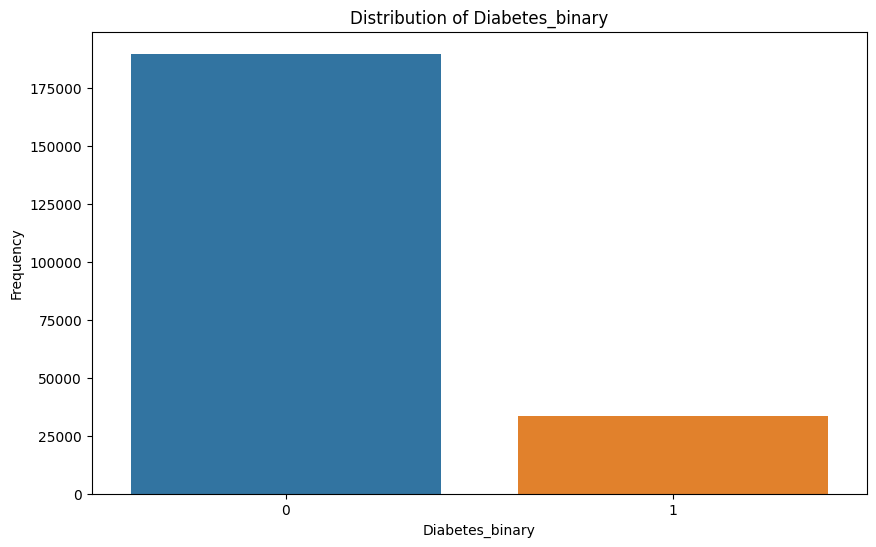

In [ ]:
# Custom palette for the bars
palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plotting the count plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes_binary', data=df, palette=palette)
plt.title('Distribution of Diabetes_binary')
plt.xlabel('Diabetes_binary')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Tipe data masih dalam bentuk float, dikonveris ke int
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223243 entries, 0 to 236377
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       223243 non-null  int64  
 1   HighBP                223243 non-null  int64  
 2   HighChol              223243 non-null  float64
 3   CholCheck             223243 non-null  int64  
 4   BMI                   223243 non-null  float64
 5   Smoker                223243 non-null  float64
 6   Stroke                223243 non-null  float64
 7   HeartDiseaseorAttack  223243 non-null  float64
 8   PhysActivity          223243 non-null  int64  
 9   Fruits                223243 non-null  int64  
 10  Veggies               223243 non-null  int64  
 11  HvyAlcoholConsump     223243 non-null  int64  
 12  AnyHealthcare         223243 non-null  int64  
 13  NoDocbcCost           223243 non-null  float64
 14  GenHlth               223243 non-null  float64
 15  MentH

In [ ]:
df['Diabetes_binary']=df['Diabetes_binary'].astype(int)
df['HighChol']=df['HighChol'].astype(int)
df['BMI']=df['BMI'].astype(int)
df['Smoker']=df['Smoker'].astype(int)
df['Stroke']=df['Stroke'].astype(int)
df['HeartDiseaseorAttack']=df['HeartDiseaseorAttack'].astype(int)
df['NoDocbcCost']=df['NoDocbcCost'].astype(int)
df['GenHlth']=df['GenHlth'].astype(int)
df['MentHlth']=df['MentHlth'].astype(int)
df['PhysHlth']=df['PhysHlth'].astype(int)
df['DiffWalk']=df['DiffWalk'].astype(int)
df['Income']=df['Income'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223243 entries, 0 to 236377
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       223243 non-null  int64
 1   HighBP                223243 non-null  int64
 2   HighChol              223243 non-null  int64
 3   CholCheck             223243 non-null  int64
 4   BMI                   223243 non-null  int64
 5   Smoker                223243 non-null  int64
 6   Stroke                223243 non-null  int64
 7   HeartDiseaseorAttack  223243 non-null  int64
 8   PhysActivity          223243 non-null  int64
 9   Fruits                223243 non-null  int64
 10  Veggies               223243 non-null  int64
 11  HvyAlcoholConsump     223243 non-null  int64
 12  AnyHealthcare         223243 non-null  int64
 13  NoDocbcCost           223243 non-null  int64
 14  GenHlth               223243 non-null  int64
 15  MentHlth              223243 non-null  

In [ ]:
# mengecek null value
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Income                  0
dtype: int64

In [ ]:
# Splitting dataset
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

# Split data into training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((178594, 20), (44649, 20), (178594,), (44649,))

# Preprocessing Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import f1_score, auc, roc_curve
from itertools import cycle
from sklearn.metrics import RocCurveDisplay

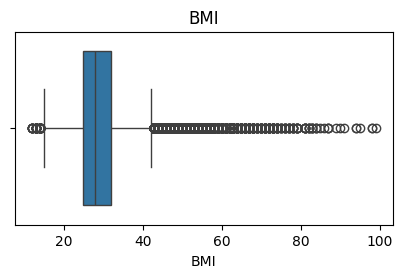

In [ ]:
# Mengecek data outlier
def remove_outliers_iqr(X, y, column):
  Q1 = X[column].quantile(0.25)
  Q3 = X[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  mask = (X[column] >= lower_bound) & (X[column] <= upper_bound)
  return X[mask], y[mask]

columns = ["BMI"]
# Set the size of the plots
plt.figure(figsize=(20, 10))

# Create box plots for each column
for i, column in enumerate(columns):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(x=X_train[column])
    plt.title(column)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

Number of rows after removing outliers: 171162


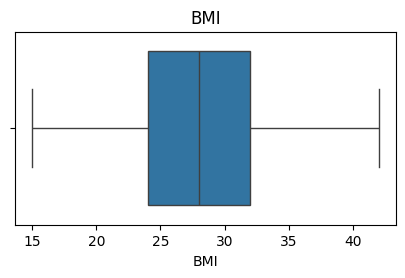

In [ ]:
# Iterate through each column and remove outliers
for column in columns:
  X_train, y_train = remove_outliers_iqr(X_train, y_train, column)

# Print the number of remaining rows
print(f"Number of rows after removing outliers: {X_train.shape[0]}")

columns = ["BMI"]

# Set the size of the plots
plt.figure(figsize=(20, 10))

# Create box plots for each column
for i, column in enumerate(columns):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(x=X_train[column])
    plt.title(column)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [ ]:
# Scaling hanya pada training set
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# Transform test set dengan parameter dari training set
X_test = scaler.transform(X_test)

In [ ]:
def plot_auc(pipeline, X_train, y_train, X_test, y_test):
  y_score = pipeline.predict_proba(X_test)
  label_binarizer = LabelBinarizer().fit(y_train)
  y_onehot_test = label_binarizer.transform(y_test)

  n_classes = len(np.unique(y))

  target_names = list(y_train.value_counts().keys())

  # store the fpr, tpr, and roc_auc for all averaging strategies
  fpr, tpr, roc_auc = dict(), dict(), dict()
  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  fpr_grid = np.linspace(0.0, 1.0, 1000)

  # Interpolate all ROC curves at these points
  mean_tpr = np.zeros_like(fpr_grid)

  for i in range(n_classes):
      mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

  # Average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = fpr_grid
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  fig, ax = plt.subplots(figsize=(6, 6))

  plt.plot(
      fpr["micro"],
      tpr["micro"],
      label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
      color="deeppink",
      linestyle="--",
      linewidth=4,
  )

  plt.plot(
      fpr["macro"],
      tpr["macro"],
      label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
      color="navy",
      linestyle="--",
      linewidth=4,
  )

  colors = cycle(["aqua", "darkorange", "cornflowerblue"])
  for class_id, color in zip(range(n_classes), colors):
      RocCurveDisplay.from_predictions(
          y_onehot_test[:, class_id],
          y_score[:, class_id],
          name=f"ROC curve for {target_names[class_id]}",
          color=color,
          ax=ax,
      )

  _ = ax.set(
      xlabel="False Positive Rate",
      ylabel="True Positive Rate",
      title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
  )

# Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.combine import SMOTEENN
from sklearn.dummy import DummyClassifier
from tqdm import tqdm

In [ ]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Random Over-sampling
over_sampler = RandomOverSampler(random_state=SEED)
X_over, y_over = over_sampler.fit_resample(X_train_scaled, y_train)

# Random Under-sampling
under_sampler = RandomUnderSampler(random_state=SEED)
X_under, y_under = under_sampler.fit_resample(X_train_scaled, y_train)

# SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=SEED, n_jobs=-1)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

# SMOTE-ENN (SMOTE with Edited Nearest Neighbors)
smote_enn = SMOTEENN(random_state=SEED, n_jobs=-1)
X_smote_enn, y_smote_enn = smote_enn.fit_resample(X_train_scaled, y_train)

# ADASYN (Adaptive Synthetic Sampling Approach for Imbalanced Learning)
adasyn = ADASYN(random_state=SEED)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train_scaled, y_train)

# ENN (Edited Nearest Neighbors)
enn = EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X_train_scaled, y_train)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=SEED)

# Create a Random Classifier
random_classifier = DummyClassifier(strategy='stratified', random_state=SEED)

# Create an empty DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Sampling Method', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'])

# Train and evaluate the model on different sampling methods
sampling_methods = [
    ('No Sampling', X_train_scaled, y_train),
    ('Over-sampling', X_over, y_over),
    ('Under-sampling', X_under, y_under),
    ('SMOTE', X_smote, y_smote),
    ('SMOTE-ENN', X_smote_enn, y_smote_enn),
    ('ADASYN', X_adasyn, y_adasyn),
    ('ENN', X_enn, y_enn)
]

for method_name, X_resampled, y_resampled in tqdm(sampling_methods, desc='Evaluating Sampling Methods'):
    if method_name == 'No Sampling':
        classifier = random_classifier
    else:
        classifier = rf_classifier

    classifier.fit(X_resampled, y_resampled)
    y_pred = classifier.predict(X_test_scaled)
    y_score = classifier.predict_proba(X_test_scaled)  # Probability scores for each class
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    auc = roc_auc_score(y_test, y_score, multi_class='ovr')  # Calculate AUC score


    # Append the evaluation metrics to the DataFrame
    metrics_df.loc[len(metrics_df)] = [method_name, accuracy, precision, recall, f1, auc]

Evaluating Sampling Methods: 100%|██████████| 7/7 [04:32<00:00, 38.98s/it]


In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.combine import SMOTEENN
# from imblearn.under_sampling import EditedNearestNeighbours
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.dummy import DummyClassifier
# from tqdm import tqdm
# import pandas as pd

# # Assuming SEED, X_train, y_train, X_test, y_test are already defined

# # Scaling the data (if not done earlier)
# X_train_scaled = X_train.copy()
# X_test_scaled = X_test.copy()

# # SMOTE-ENN (SMOTE with Edited Nearest Neighbors)
# smote_enn = SMOTEENN(random_state=SEED, n_jobs=-1)
# X_smote_enn, y_smote_enn = smote_enn.fit_resample(X_train_scaled, y_train)

# # Create a Random Forest classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=SEED)

# # Create a Random Classifier
# random_classifier = DummyClassifier(strategy='stratified', random_state=SEED)

# Create an empty DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Sampling Method', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Sensitivity', 'Specificity', 'AUC'])

# Train and evaluate the model on different sampling methods
sampling_methods = [
    ('SMOTE-ENN', X_smote_enn, y_smote_enn),
]

for method_name, X_resampled, y_resampled in tqdm(sampling_methods, desc='Evaluating Sampling Methods'):
    if method_name == 'No Sampling':
        classifier = random_classifier
    else:
        classifier = rf_classifier

    classifier.fit(X_resampled, y_resampled)
    y_pred = classifier.predict(X_test_scaled)
    y_score = classifier.predict_proba(X_test_scaled)  # Probability scores for each class

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Calculate AUC score, ensuring y_score is the probability of the positive class
    if len(set(y_train)) == 2:  # Binary classification
        auc = roc_auc_score(y_test, y_score[:, 1])  # Only use the positive class scores
    else:  # Multi-class classification
        auc = roc_auc_score(y_test, y_score, multi_class='ovr')  # Use 'ovr' for multi-class

    # Calculate confusion matrix to get sensitivity and specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)  # Sensitivity (Recall for the positive class)
    specificity = tn / (tn + fp)  # Specificity

    # Append the evaluation metrics to the DataFrame
    metrics_df.loc[len(metrics_df)] = [method_name, accuracy, precision, recall, f1, sensitivity, specificity, auc]

Evaluating Sampling Methods: 100%|██████████| 1/1 [00:50<00:00, 50.13s/it]


In [ ]:
# Print the evaluation metrics DataFrame
print(metrics_df)

  Sampling Method  Accuracy  Precision    Recall  F1-score  Sensitivity  \
0       SMOTE-ENN  0.765549   0.634385  0.709895  0.648584     0.630484   

   Specificity       AUC  
0     0.789307  0.790922  


# Evaluasi

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN

In [ ]:
# SMOTE-ENN (SMOTE with Edited Nearest Neighbors)
smote_enn = SMOTEENN(random_state=SEED, n_jobs=-1)
X_train, y_train = smote_enn.fit_resample(X_train, y_train)

In [ ]:
# Inisiasi RF dengan default parameter
model = RandomForestClassifier()

# Fit pipeline pada seluruh training data
model.fit(X_train, y_train)

RandomForestClassifier()

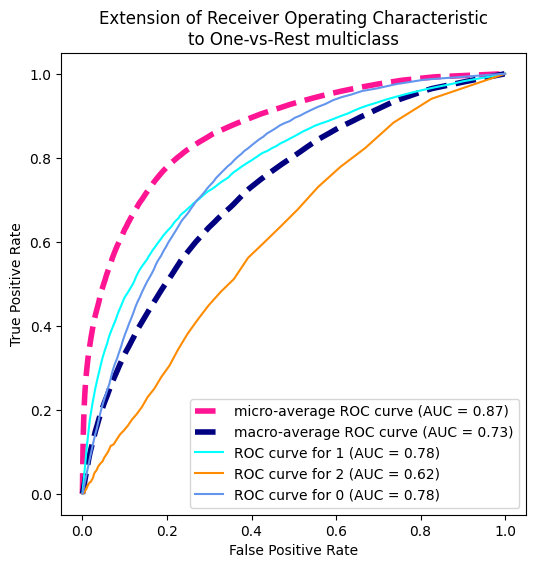

In [ ]:
plot_auc(model, X_train, y_train, X_test, y_test)

In [ ]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

cols = [name for name in X.columns]
df_imp = pd.DataFrame({"feature": cols, "importance": importances}).sort_values("importance", ascending=False)

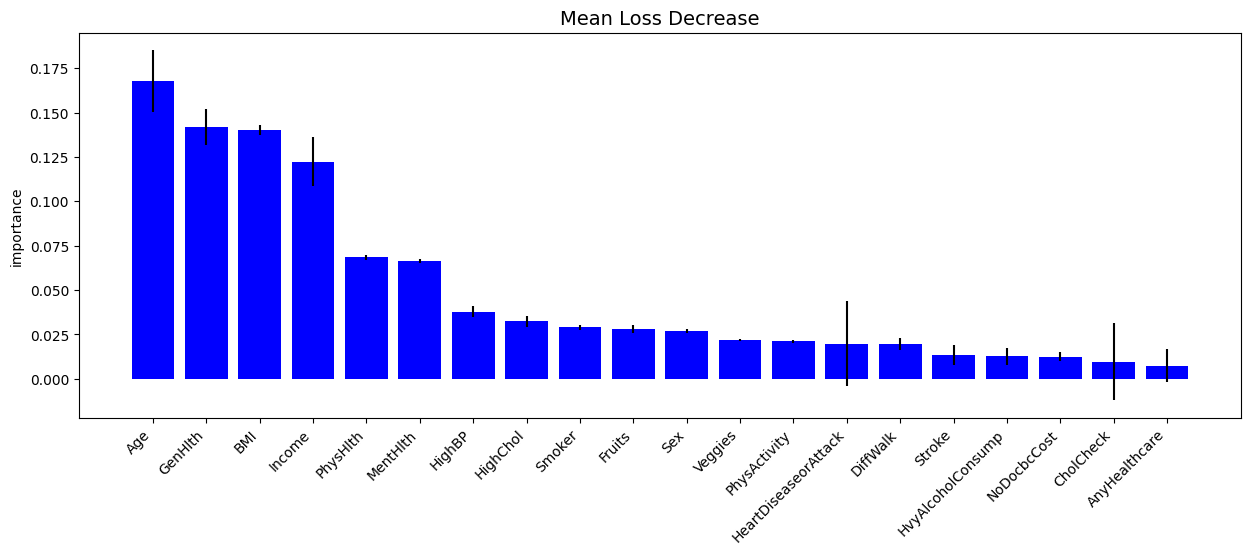

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(range(len(df_imp)), df_imp.importance, color='b', yerr=std)
plt.xticks(range(len(df_imp)), df_imp.feature, rotation=45, horizontalalignment='right')
plt.ylabel('importance')
plt.title("Mean Loss Decrease", fontsize=14);